cc_pixel_intensity_ratio
150
Confusion Matrix:
[[21  4]
 [ 4  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.69      0.69      0.69        13

    accuracy                           0.79        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.79      0.79      0.79        38



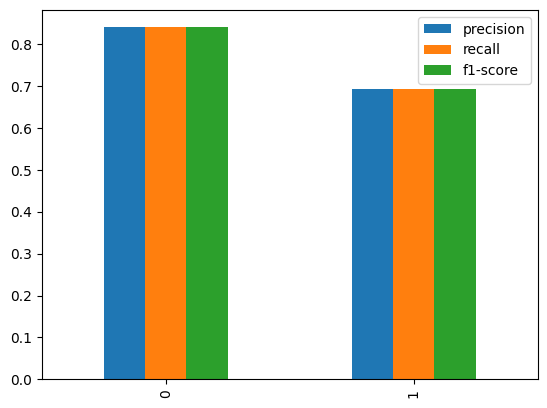

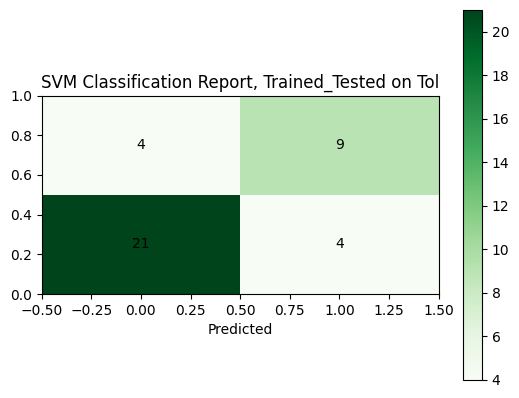

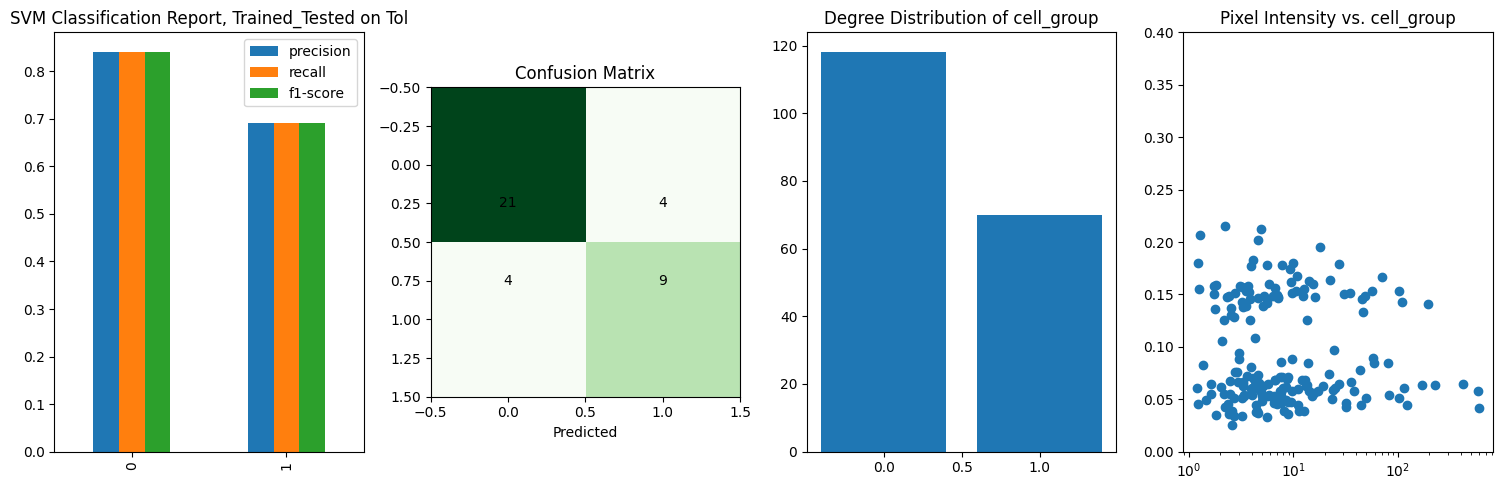

In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# 1. Load the dataset
data = pd.read_csv('All_Groups.csv')
# if Tol or TCDD1nM1hr in the file_name, keep it

data = data[data['file_name'].str.contains('Tol')]
data = data[~data['file_name'].str.contains('Tol4hr')]

# drop the standalones
data = data[data['edges'] >1]

data = data.drop('file_name', axis = 1)
data = data.fillna(0)


cleaned_df = pd.read_csv('full_Table_HIGH_QUAL.csv')



# remove the inf and replace with 0 
data = data.replace([np.inf, -np.inf], 0)
pix_int = data['cc_pixel_intensity_ratio']

for x in data.columns: 
    if x not in cleaned_df.columns: 
        print(x)
        data = data.drop(x, axis = 1)
# replace nan with 0 
# just drop the rows with nan
# 2. Data Preprocessing
# Assuming 'cell_group' is your target column
X = data.drop('cell_group', axis=1)  # Features
y = data['cell_group']  # Target variable

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train the SVM Model
svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)
svm_model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = svm_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# store the classification report and turn into barchart
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
# add the confusion matrix to the plot
plt.figure()

# add confusion matrix with values to the plot 
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.text(0, 0.25, conf_matrix[0][0], ha='center', va='center')
plt.text(0, 0.75, conf_matrix[0][1], ha='center', va='center')
plt.text(1, 0.25, conf_matrix[1][0], ha='center', va='center')
plt.text(1, 0.75, conf_matrix[1][1], ha='center', va='center')
plt.colorbar()
plt.xlabel('Predicted')



plt.title('SVM Classification Report, Trained_Tested on Tol')
plt.ylim(0, 1)

# create a 1x3 subplot
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# draw a plot to show this for 0, 1
df.iloc[0:2].plot(kind='bar', ax=ax[0])
ax[0].set_title('SVM Classification Report, Trained_Tested on Tol')

# add the confusion matrix to the plot
conf_matrix = confusion_matrix(y_test, y_pred)
ax[1].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
ax[1].text(0, 0.25, conf_matrix[0][0], ha='center', va='center')
ax[1].text(0, 0.75, conf_matrix[0][1], ha='center', va='center')
ax[1].text(1, 0.25, conf_matrix[1][0], ha='center', va='center')
ax[1].text(1, 0.75, conf_matrix[1][1], ha='center', va='center')
ax[1].set_xlabel('Predicted')
ax[1].set_title('Confusion Matrix')

# plot degree distribution of cell_group
cell_group_counts = data['cell_group'].value_counts()
ax[2].bar(cell_group_counts.index, cell_group_counts.values)
ax[2].set_title('Degree Distribution of cell_group')

ax[3].scatter(data['cc_length_(um)'], pix_int)
ax[3].set_title('Network Length vs Pixel Intensity Ratio')
ax[3].set_xscale('log')
ax[3].set_ylim(0, 0.4)


plt.tight_layout()
plt.show()



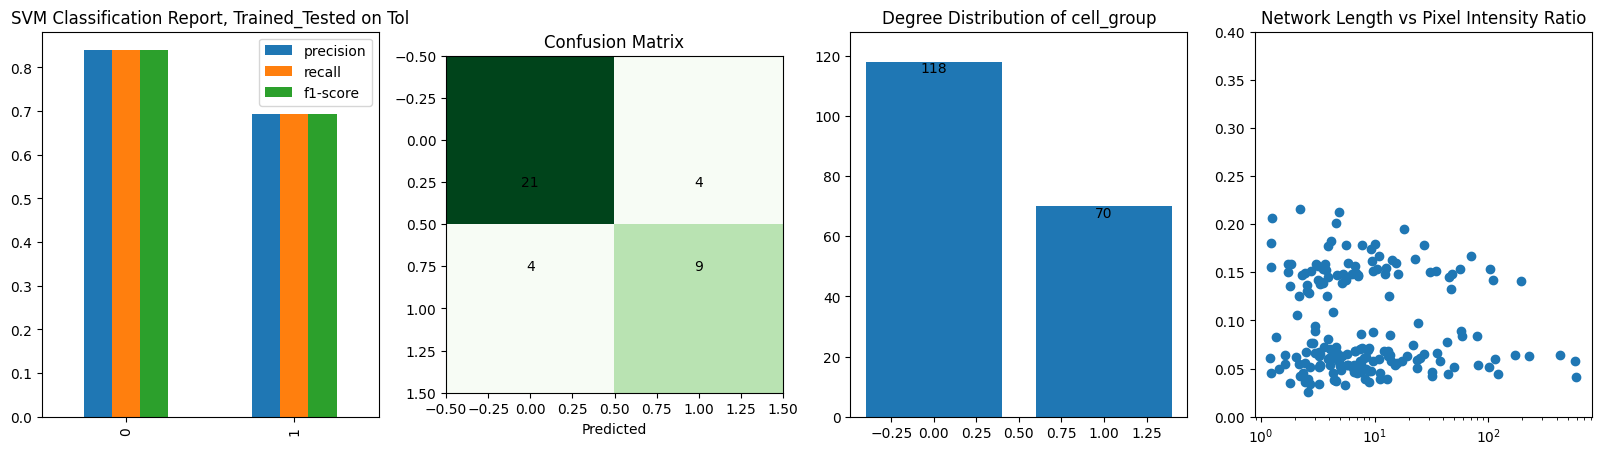

In [46]:
import matplotlib.pyplot as plt

def plot_classification_report_and_confusion_matrix(df, y_test, y_pred, data, pix_int):
    # create a 1x4 subplot
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    # draw a plot to show this for 0, 1
    df.iloc[0:2].plot(kind='bar', ax=ax[0])
    ax[0].set_title('SVM Classification Report, Trained_Tested on Tol')

    # add the confusion matrix to the plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax[1].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
    ax[1].text(0, 0.25, conf_matrix[0][0], ha='center', va='center')
    ax[1].text(0, 0.75, conf_matrix[0][1], ha='center', va='center')
    ax[1].text(1, 0.25, conf_matrix[1][0], ha='center', va='center')
    ax[1].text(1, 0.75, conf_matrix[1][1], ha='center', va='center')
    ax[1].set_xlabel('Predicted')
    ax[1].set_title('Confusion Matrix')

    # plot degree distribution of cell_group
    cell_group_counts = data['cell_group'].value_counts()
    ax[2].bar(cell_group_counts.index, cell_group_counts.values)
    ax[2].set_title('Degree Distribution of cell_group')
    # add the excat number of each cell group
    ax[2].set_ylim(0, cell_group_counts.max() + 10)

    ax[2].text(0, cell_group_counts[0], cell_group_counts[0], ha='center', va='top')
    ax[2].text(1, cell_group_counts[1], cell_group_counts[1], ha='center', va='top')
    # put it just above the bar
    

    ax[3].scatter(data['cc_length_(um)'], pix_int)
    ax[3].set_title('Network Length vs Pixel Intensity Ratio')
    ax[3].set_xscale('log')
    ax[3].set_ylim(0, 0.4)

    return fig

a = plot_classification_report_and_confusion_matrix(df, y_test, y_pred, data, pix_int)

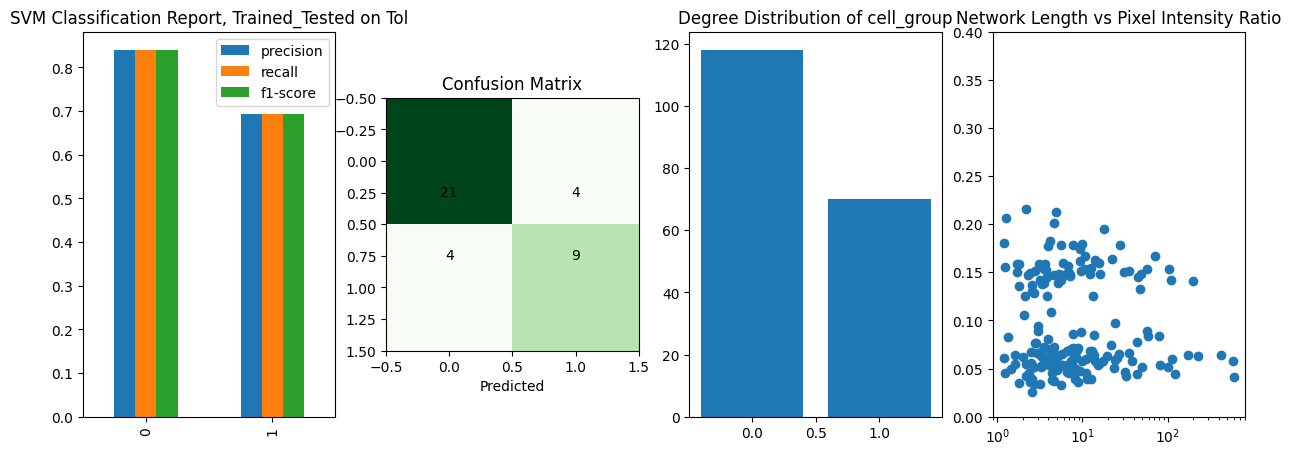

In [4]:
# things to check, see if the dataset i made and the one rithik made are same 
bir_df = pd.read_csv('All_Groups.csv')
bir_df = bir_df[bir_df['file_name'].str.contains('Tol')]
bir_df = bir_df[~bir_df['file_name'].str.contains('Tol4hr')]

rit_df = pd.read_csv('full_Table_HIGH_QUAL.csv')


In [61]:
bir_df_sub = bir_df[['line_id', 'point_id', 'cc_pixel_intensity_ratio', 'cell_group', 'cc_length_(um)', 'edges']]
rit_df_sub = rit_df[['line_id', 'point_id',  'cc_length_(um)', 'cell_group']]

In [9]:
bir_df.drop_duplicates(subset = ['line_id', 'point_id', 'file_name'], keep = 'first', inplace = True)
bir_df

,x,y,z,node_x,line_id,point_id,degree_x,vol_cc_x,avg_PK_Of_element_x,element_connectivity_x,...,degree_distribution_4,degree_distribution_5,degree_distribution_7,degree_distribution_0,degree_distribution_6,degree_distribution_2,degree_distribution_8,degree_distribution_9,degree_distribution_11,degree_distribution_10
740,11.336,18.720,9.0,0.0,653,2,1.0,0.35693,2.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,13.416,26.208,8.5,1.0,654,4,1.0,0.29203,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,11.232,17.264,8.0,6.0,650,2,1.0,0.04326,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,9.880,14.976,7.5,8.0,649,5,1.0,0.15142,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,16.952,25.688,7.0,10.0,623,21,1.0,6.04614,2.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,12.688,9.464,1.5,393.0,13,3,1.0,0.12438,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10948,11.752,9.360,1.5,395.0,14,2,1.0,0.18387,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10949,10.400,7.280,1.5,401.0,271,6,1.0,0.19469,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10950,30.056,6.760,1.5,403.0,6,16,1.0,0.21091,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['x', 'y', 'z', 'node_x', 'line_id', 'point_id', 'degree_x', 'vol_cc_x',
       'avg_PK_Of_element_x', 'element_connectivity_x', 'Unnamed: 0_y',
       'cc_length_(um)', 'cc_vol_from_img_(um3)', 'branches', 'nodes', 'edges',
       'cc_pixel_intensity_ratio', 'cc_average_degree_excludeFreeEnds',
       'cc_max_PK', 'cc_average_connectivity', 'diameter',
       'element_length_(um)', 'element_average_width', 'element_Volume_Voxel',
       'x_x', 'y_x', 'z_x', 'width_(um)', 'x_pixel', 'y_pixel', 'z_pixel',
       'distance', 'x_y', 'y_y', 'z_y', 'node_y', 'degree_y', 'cc_y',
       'vol_cc_y', 'avg_PK_Of_element_y', 'element_connectivity_y',
       'coeff_of_variance_cc', 'coeff_of_variance_line_id', 'density',
       'pathLength', 'clustering_coefficient', 'matching_index', 'cc_center_x',
       'cc_center_y', 'cc_center_z', 'center_x', 'center_y', 'center_z',
       'distance_to_center', 'order', 'Angle_Flag', 'cell_group', 'file_name',
       'degree_distribution_1', 'degree_dis

In [62]:
# merge the two dataframes
merged_df = pd.merge(bir_df_sub, rit_df_sub, on = ['line_id', 'point_id'])

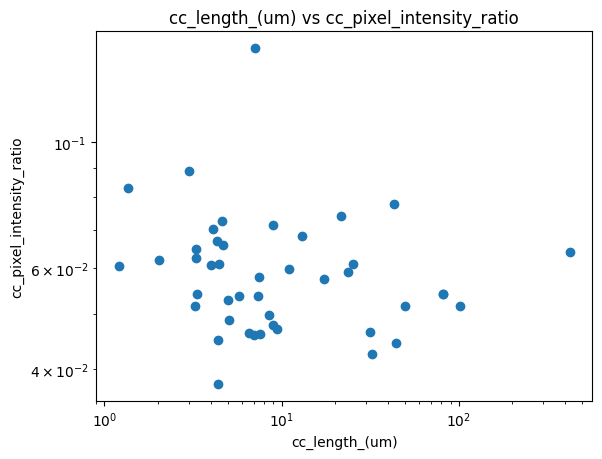

In [64]:
merged_df = merged_df[merged_df['edges'] > 1]

plt.scatter(merged_df['cc_length_(um)_x'], merged_df['cc_pixel_intensity_ratio'])
plt.xlabel('cc_length_(um)')
plt.ylabel('cc_pixel_intensity_ratio')
plt.title('cc_length_(um) vs cc_pixel_intensity_ratio')
plt.xscale('log')
plt.yscale('log') 




cell_group
0    181
1     18
Name: count, dtype: int64

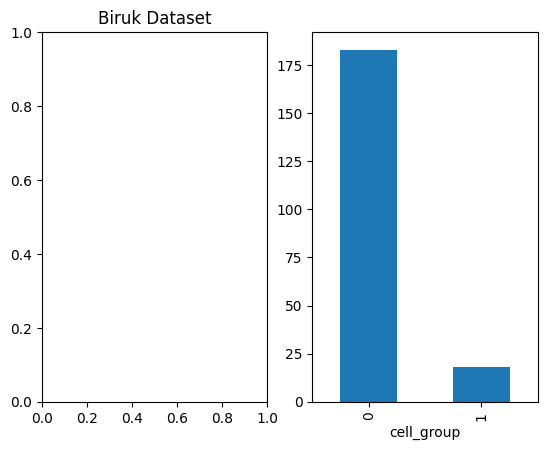

In [42]:
# get me a data distribution of the cell_group
fig, ax = plt.subplots(1, 2)

# plot this on ax[0]
ax[0].set_title('Biruk Dataset')
bir_df['cell_group'].value_counts().plot(kind='bar')

rit_df['cell_group'].value_counts()



In [43]:
bir_df['cell_group'].value_counts()


cell_group
0    183
1     18
Name: count, dtype: int64

<Axes: xlabel='cell_group'>

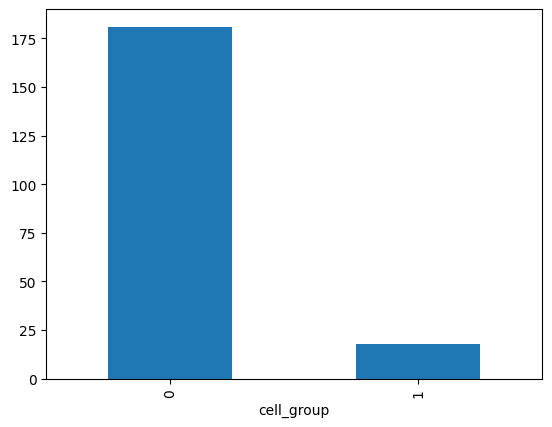

In [44]:
# do data distribution of the cell groups=
data['cell_group'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Distribution of y_train for Tol and TCDD1nM1hr')

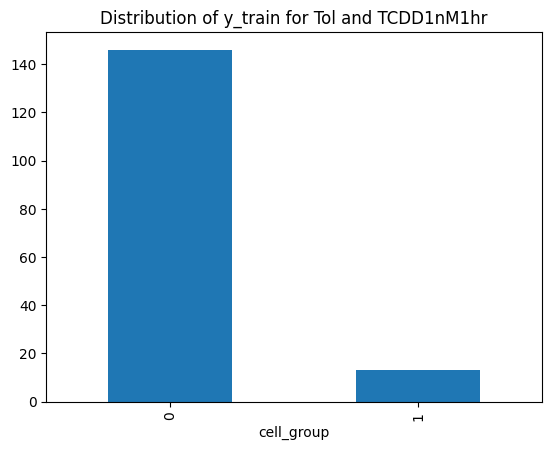

In [45]:
# get distribution of y_train as a bar chart
y_train.value_counts().plot(kind='bar')
plt.title('Distribution of y_train for Tol and TCDD1nM1hr')

For 
Confusion Matrix:
[[35  0]
 [ 3  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.40      0.57         5

    accuracy                           0.93        40
   macro avg       0.96      0.70      0.77        40
weighted avg       0.93      0.93      0.91        40



(0.0, 1.0)

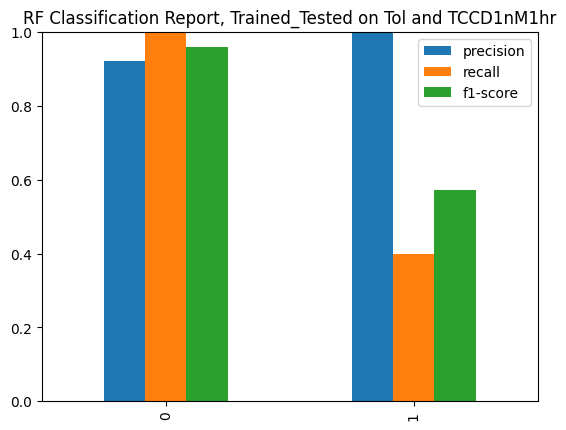

In [46]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data (steps 1 and 2)

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train, y_train)

# 5. Evaluate the model
y_pred = rf_model.predict(X_test)
print("For ")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# store the classification report and turn into barchart
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('RF Classification Report, Trained_Tested on Tol and TCCD1nM1hr')
plt.ylim(0, 1)

In [47]:
def prep_for_test(data): 
    data = data.drop('file_name', axis = 1)
    new_y_real = data['cell_group']
    data = data.drop('cell_group', axis=1)
    data = data.fillna(0)
#   drop values that are infinite 
    data = data.replace([np.inf, -np.inf], 0)
    return data, new_y_real


new_X_test = pd.read_csv('All_Groups.csv')
new_X_test, new_y = prep_for_test(new_X_test)
new_X_test = new_X_test[X_test.columns] # making the order the same



Confusion Matrix:
[[ 195 6927]
 [ 162 4794]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.03      0.05      7122
           1       0.41      0.97      0.57      4956

    accuracy                           0.41     12078
   macro avg       0.48      0.50      0.31     12078
weighted avg       0.49      0.41      0.27     12078



/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Classification Report, Trained on Tol + TCDD, Tested on All')

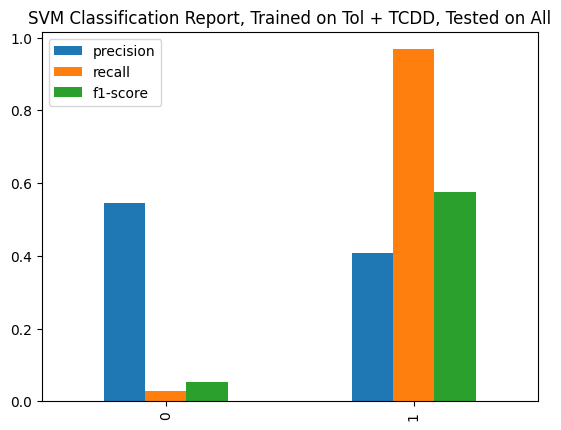

In [48]:
# see how accurate new_pred and new_y are 
# filli n the Nan with 0s
new_pred = svm_model.predict(new_X_test)
print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('SVM Classification Report, Trained on Tol + TCDD, Tested on All')

Confusion Matrix:
[[7058   64]
 [4840  116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      7122
           1       0.64      0.02      0.05      4956

    accuracy                           0.59     12078
   macro avg       0.62      0.51      0.39     12078
weighted avg       0.61      0.59      0.46     12078



Text(0.5, 1.0, 'RF Classification Report, Trained on Tol + TCDD, Tested on All')

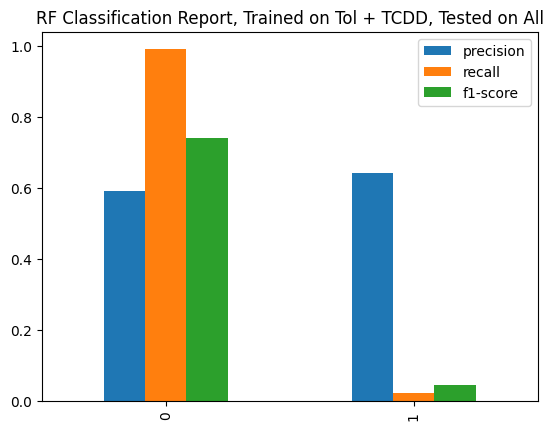

In [49]:
# see how accurate new_pred and new_y are 
new_pred = rf_model.predict(new_X_test)

print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('RF Classification Report, Trained on Tol + TCDD, Tested on All')